In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data files
ride_data_orig = "Resources/Metro_Bike_Share_Trip_Data.csv"
ride_data_17_Q2 = "Resources/la_metro_gbfs_trips_Q2_2017.csv"
ride_data_17_Q3 = "Resources/metro-bike-share-trips-2017-q3.csv"
ride_data_17_Q4 = "Resources/metro-bike-share-trips-2017-q4-v2.csv"
ride_data_18_Q1 = "Resources/metro-bike-share-trips-2018-q1.csv"
#weather_data = "Resources/la_weather_2016_2018.csv" TBD

ride_orig_df = pd.read_csv(ride_data_orig, low_memory=False)
ride_17_Q2_df = pd.read_csv(ride_data_17_Q2, low_memory=False)
ride_17_Q3_df = pd.read_csv(ride_data_17_Q3, low_memory=False)
ride_17_Q4_df = pd.read_csv(ride_data_17_Q4, low_memory=False)
ride_18_Q1_df = pd.read_csv(ride_data_18_Q1, low_memory=False)

# This is for when the dataframes are combined for the rides per month for 2017 is created
ride_orig_df.rename(columns={'Start Time':'start_time'}, inplace=True)

# Drop columns that aren't needed (leaving some for future analysis)
# Note (Starting Lat-Long and Ending Lat-Long) do not exist in the newer data
ride_orig_df.drop(['Starting Station Latitude', 'Starting Station Longitude', 'Ending Station Latitude',
                   'Ending Station Longitude','Starting Lat-Long', 'Ending Lat-Long'], axis=1, inplace=True)
ride_17_Q2_df.drop(['start_lat', 'start_lon', 'end_lat', 'end_lon'], axis=1, inplace=True)
ride_17_Q3_df.drop(['start_lat', 'start_lon', 'end_lat', 'end_lon'], axis=1, inplace=True)
ride_17_Q4_df.drop(['start_lat', 'start_lon', 'end_lat', 'end_lon'], axis=1, inplace=True)
ride_18_Q1_df.drop(['start_lat', 'start_lon', 'end_lat', 'end_lon'], axis=1, inplace=True)

# Drop rows that have any NaN values
ride_orig_df = ride_orig_df.dropna()
ride_17_Q2_df = ride_17_Q2_df.dropna()
ride_17_Q3_df = ride_17_Q3_df.dropna()
ride_17_Q4_df = ride_17_Q4_df.dropna()
ride_18_Q1_df = ride_18_Q1_df.dropna()


In [2]:
### Custom Functions

### Datetime data after Q1 2017 is not zero padded and it has to be zero padded (see below)
def datetime_reformat(dt_str):
    # seperate date and time
    dt_strings = dt_str.split()
    date_str = dt_strings[0]
    time_str = dt_strings[1]
    
    # split up the date field
    date_fields = date_str.split("/")
    
    # do the formatting
    if (len(date_str) == 6):
        # add zero to month and date
        new_date = "0" + date_fields[0] + "/0" + date_fields[1] + "/" + date_fields[2]
    elif (len(date_str) == 7):
        if (len(date_fields[0]) == 2):
            # add zero to day
            new_date = date_fields[0] + "/0" + date_fields[1] + "/" + date_fields[2]
        else:
            # add zero to month
            new_date = "0" + date_fields[0] + "/" + date_fields[1] + "/" + date_fields[2]
    else:
        new_date = date_str
    
    if (len(time_str) == 4):
        # add zero to hour
        new_time = "0" + time_str
    else:
        new_time = time_str
        
    # final string
    new_str = new_date + " " + new_time
    
    return new_str


In [3]:
### Why datetime_reformat is needed ###

# start_time and end_time columns must be formated (zero padded) so they can be converted to python datetime obj.
# From https://stackoverflow.com/questions/41191365/python-datetime-strptime-error-is-a-bad-directive-in-format-m-d-y-h
# The use of %-m (for non-zero padded month value), will not work on a platform that dosn't have the
# proper GNU strftime C library function installed. Or from the Python datetime module documentation, the format
# codes that the C standard (1989 version) supports does not include %-m (and the others with a - indicating no
# zero padding). The 1999 version of the C standard added additional format codes. Interpreting these codes is not
# part of Python.

# Setup to use datetime_reformat function
v_format = np.vectorize(datetime_reformat)

# Convert to zero padded
ride_17_Q2_df['start_time'] = v_format(ride_17_Q2_df.start_time)
ride_17_Q3_df['start_time'] = v_format(ride_17_Q3_df.start_time)
ride_17_Q4_df['start_time'] = v_format(ride_17_Q4_df.start_time)
ride_18_Q1_df['start_time'] = v_format(ride_18_Q1_df.start_time)


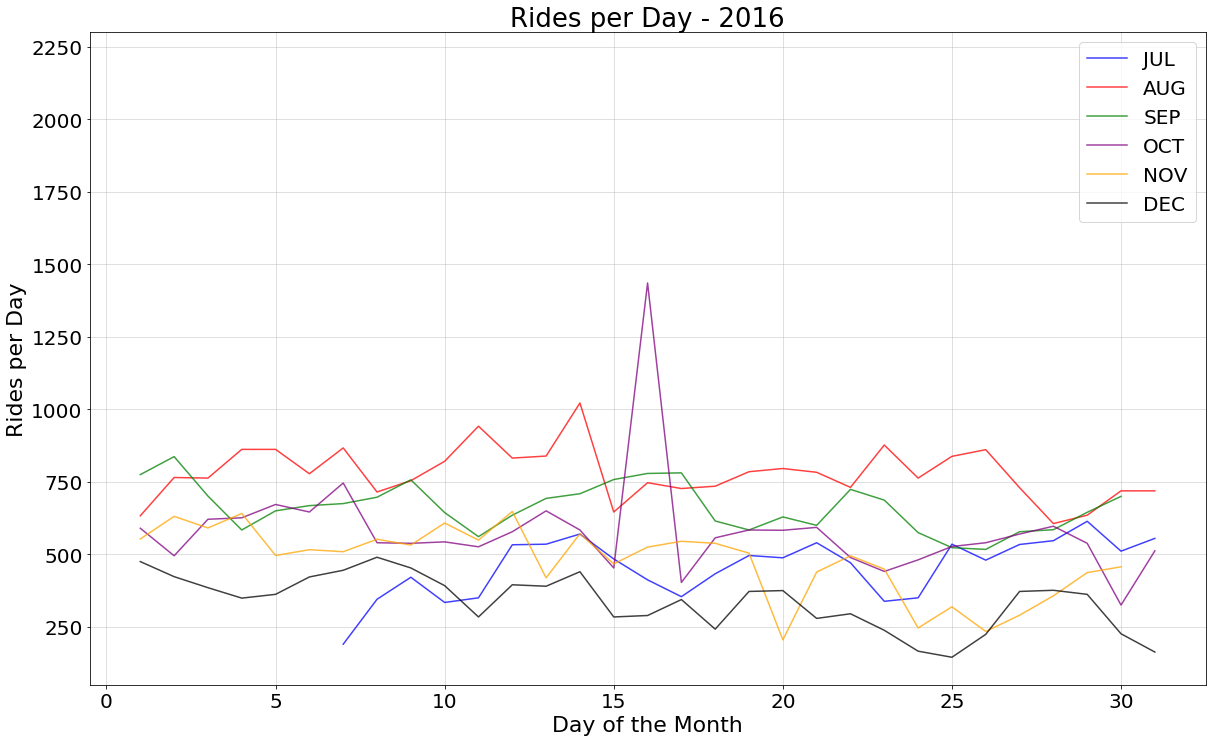

In [26]:
### This is the original csv file with data from 7/16 to 3/17 ###
### (But only using 2016 here, 2017 plotted later) ###

# Looking at total rides per day
# Convert date/time strings to datetime objects
ride_orig_df['start_time'] = pd.to_datetime(ride_orig_df['start_time'], format='%m/%d/%Y %I:%M:%S %p')

# Add Year, Month, and Day columns
ride_orig_df['Year'] = ride_orig_df['start_time'].dt.year
ride_orig_df['Month'] = ride_orig_df['start_time'].dt.month
ride_orig_df['Day'] = ride_orig_df['start_time'].dt.day

ride_orig_2016_df = ride_orig_df.loc[ride_orig_df['Year'] == 2016]

# Get rid of unnessary columns
ride_trim_2016_df = ride_orig_2016_df[['start_time', 'Month', 'Day']]

# Group by month and day
groupedby_month_day_16 = ride_trim_2016_df.groupby(['Month', 'Day']).count()

# Create dataframe and unstack to make months columns
grouped_df = pd.DataFrame(groupedby_month_day_16)

# Make Month columns
unstacked_df = grouped_df.unstack(level=0)

# Get each months data
month_7 = unstacked_df[('start_time', 7)]
month_8 = unstacked_df[('start_time', 8)]
month_9 = unstacked_df[('start_time', 9)]
month_10 = unstacked_df[('start_time', 10)]
month_11 = unstacked_df[('start_time', 11)]
month_12 = unstacked_df[('start_time', 12)]

x_axis = np.arange(1, 32)

# Set y axis limits
axes = plt.gca()
axes.set_ylim([50,2300])

jul_handle = plt.plot(x_axis, month_7, c='blue', alpha=0.75, label="JUL")
aug_handle = plt.plot(x_axis, month_8, c='red', alpha=0.75, label="AUG")
sep_handle = plt.plot(x_axis, month_9, c='green', alpha=0.75, label="SEP")
oct_handle = plt.plot(x_axis, month_10, c='purple', alpha=0.75, label="OCT")
nov_handle = plt.plot(x_axis, month_11, c='orange', alpha=0.75, label="NOV")
dec_handle = plt.plot(x_axis, month_12, c='black', alpha=0.75, label="DEC")

plt.grid(axis='both', alpha=0.5)
plt.xlabel("Day of the Month", fontsize = 22)
plt.ylabel("Rides per Day", fontsize = 22)
plt.title('Rides per Day - 2016', fontsize = 26)

plt.rcParams['figure.figsize'] = (20,12)

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

plt.legend(loc='upper right', fontsize = 20)

# Save Figure
plt.savefig("rides_per_day_2016.png", bbox_inches="tight")


# Note for Oct 16
# http://www.welikela.com/event/ciclavia-heart-la-10-16-2016/

In [5]:
# Show plot
plt.show()

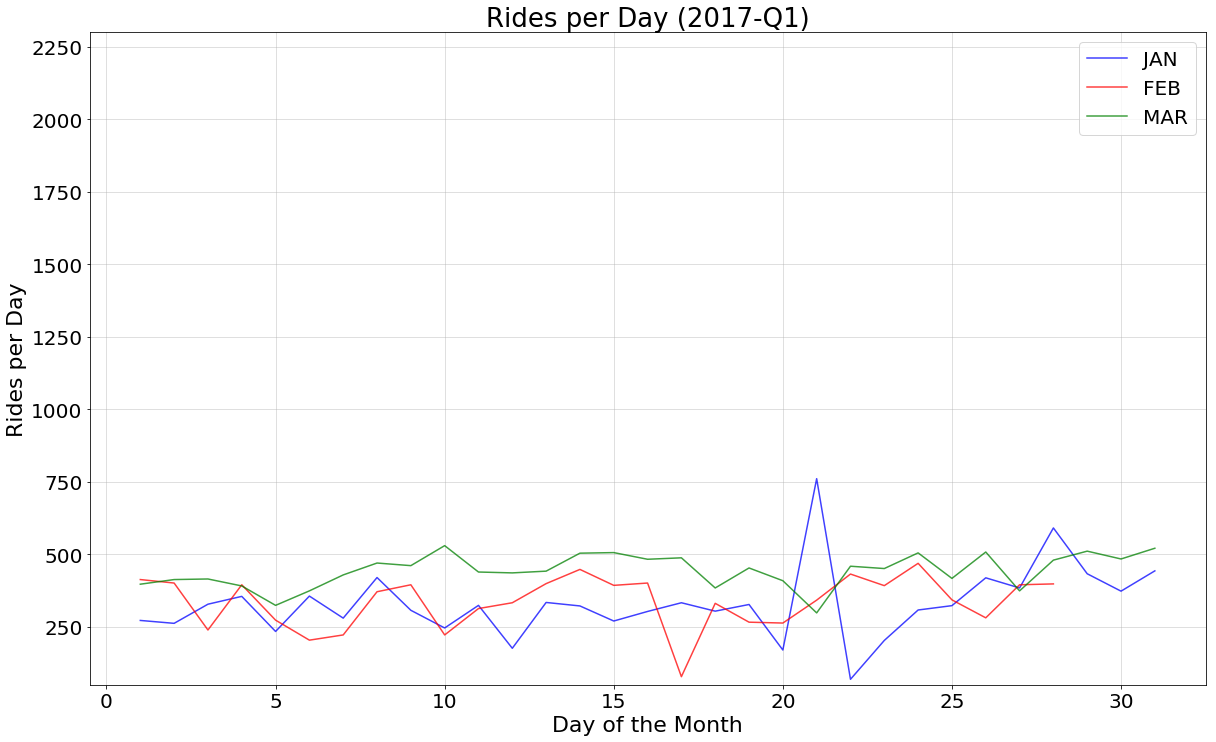

In [6]:
######## QUARTER 1 2017 ########
######## RIDES PER DAY ########

# Get Q1 data from original data file
ride_orig_2017_df = ride_orig_df.loc[ride_orig_df['Year'] == 2017]
ride_trim_2017_df = ride_orig_2017_df[['start_time', 'Month', 'Day']]

# Group by month and day
groupedby_month_day_17_Q1 = ride_trim_2017_df.groupby(['Month', 'Day']).count()

# Create dataframe and unstack to make months columns
grouped_Q1_df = pd.DataFrame(groupedby_month_day_17_Q1)

# Make Month columns
unstacked_Q1_df = grouped_Q1_df.unstack(level=0)

# Get each months data
month_1 = unstacked_Q1_df[('start_time', 1)]
month_2 = unstacked_Q1_df[('start_time', 2)]
month_3 = unstacked_Q1_df[('start_time', 3)]

x_axis = np.arange(1, 32)

# Set y axis limits
axes = plt.gca()
axes.set_ylim([50,2300])

jan_handle = plt.plot(x_axis, month_1, c='blue', alpha=0.75, label="JAN")
feb_handle = plt.plot(x_axis, month_2, c='red', alpha=0.75, label="FEB")
mar_handle = plt.plot(x_axis, month_3, c='green', alpha=0.75, label="MAR")

plt.grid(axis='both', alpha=0.5)
plt.xlabel("Day of the Month", fontsize = 22)
plt.ylabel("Rides per Day", fontsize = 22)
plt.title('Rides per Day (2017-Q1)', fontsize = 26)

plt.rcParams['figure.figsize'] = (20,12)

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

plt.legend(loc='upper right', fontsize = 20)


In [7]:
# Show plot
plt.show()

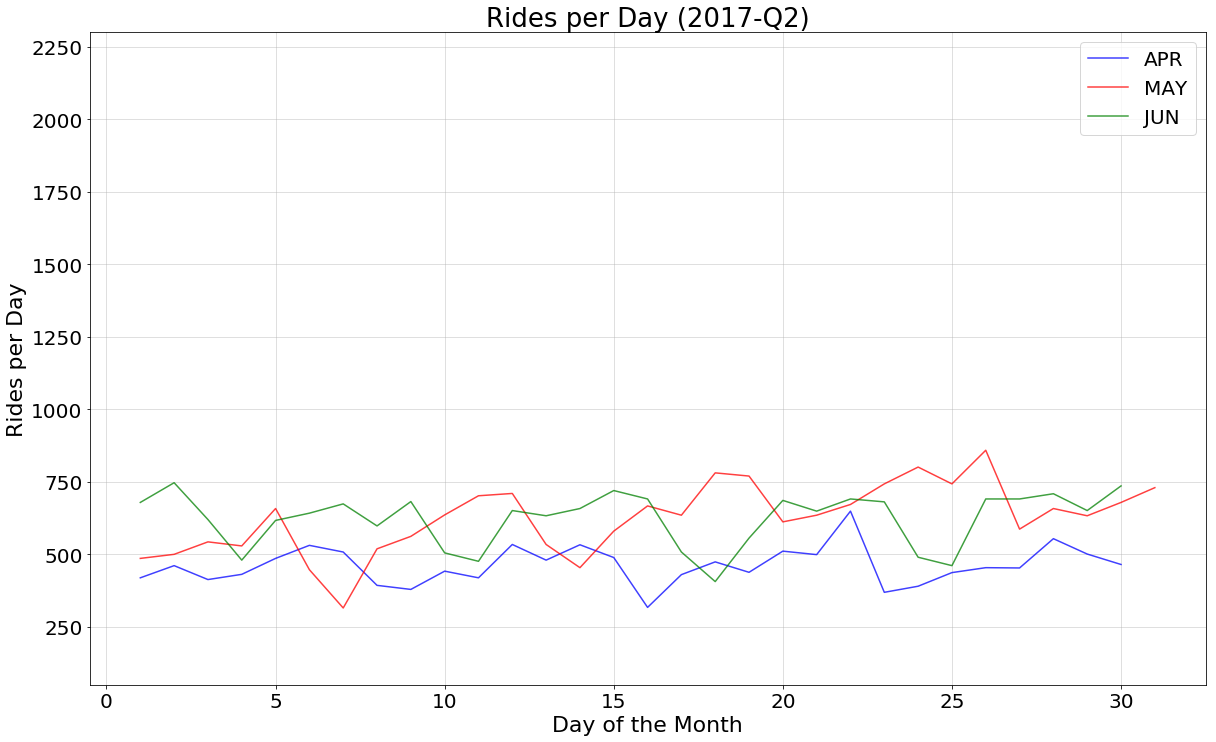

In [8]:
######## QUARTER 2 2017 ########
######## RIDES PER DAY ########

# Convert date/time strings to datetime objects
ride_17_Q2_df['start_time'] = pd.to_datetime(ride_17_Q2_df['start_time'], format='%m/%d/%y %H:%M')

# Add Year, Month, and Day columns
ride_17_Q2_df['Year'] = ride_17_Q2_df['start_time'].dt.year
ride_17_Q2_df['Month'] = ride_17_Q2_df['start_time'].dt.month
ride_17_Q2_df['Day'] = ride_17_Q2_df['start_time'].dt.day

# Trim other quarters
ride_17_Q2_trim_df = ride_17_Q2_df[['start_time', 'Month', 'Day']]

# Group by month and day
groupedby_month_day_17_Q2 = ride_17_Q2_trim_df.groupby(['Month', 'Day']).count()

# Create dataframe and unstack to make months columns
grouped_Q2_df = pd.DataFrame(groupedby_month_day_17_Q2)

# Make Month columns
unstacked_Q2_df = grouped_Q2_df.unstack(level=0)

# Get each months data
month_4 = unstacked_Q2_df[('start_time', 4)]
month_5 = unstacked_Q2_df[('start_time', 5)]
month_6 = unstacked_Q2_df[('start_time', 6)]

x_axis = np.arange(1, 32)

# Set y axis limits
axes = plt.gca()
axes.set_ylim([50,2300])

apr_handle = plt.plot(x_axis, month_4, c='blue', alpha=0.75, label="APR")
may_handle = plt.plot(x_axis, month_5, c='red', alpha=0.75, label="MAY")
jun_handle = plt.plot(x_axis, month_6, c='green', alpha=0.75, label="JUN")

plt.grid(axis='both', alpha=0.5)
plt.xlabel("Day of the Month", fontsize = 22)
plt.ylabel("Rides per Day", fontsize = 22)
plt.title('Rides per Day (2017-Q2)', fontsize = 26)

plt.rcParams['figure.figsize'] = (20,12)

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

plt.legend(loc='upper right', fontsize = 20)


In [9]:
# Show plot
plt.show()

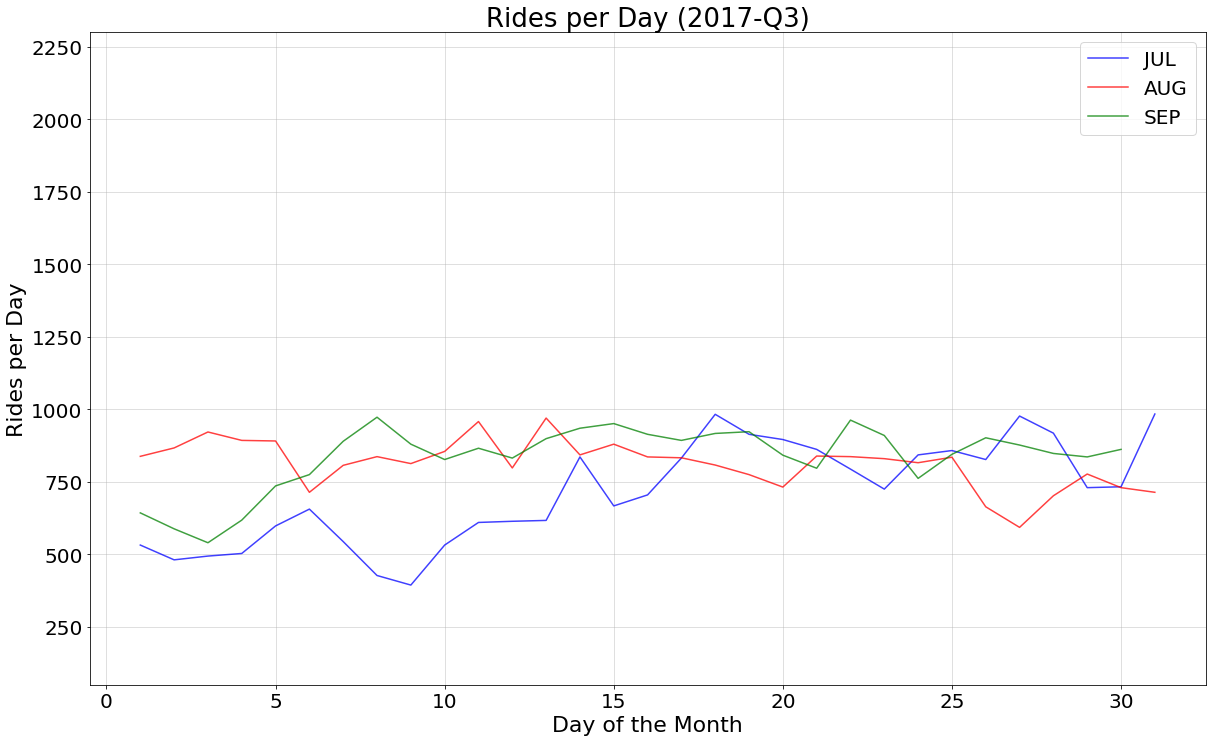

In [10]:
######## QUARTER 3 2017 ########
######## RIDES PER DAY ########

# Convert date/time strings to datetime objects
ride_17_Q3_df['start_time'] = pd.to_datetime(ride_17_Q3_df['start_time'], format='%m/%d/%y %H:%M')

# Add Year, Month, and Day columns
ride_17_Q3_df['Year'] = ride_17_Q3_df['start_time'].dt.year
ride_17_Q3_df['Month'] = ride_17_Q3_df['start_time'].dt.month
ride_17_Q3_df['Day'] = ride_17_Q3_df['start_time'].dt.day

# Trim other quarters
ride_17_Q3_trim_df = ride_17_Q3_df[['start_time', 'Month', 'Day']]

# Group by month and day
groupedby_month_day_17_Q3 = ride_17_Q3_trim_df.groupby(['Month', 'Day']).count()

# Create dataframe and unstack to make months columns
grouped_Q3_df = pd.DataFrame(groupedby_month_day_17_Q3)

# Make Month columns
unstacked_Q3_df = grouped_Q3_df.unstack(level=0)

# Get each months data
month_7 = unstacked_Q3_df[('start_time', 7)]
month_8 = unstacked_Q3_df[('start_time', 8)]
month_9 = unstacked_Q3_df[('start_time', 9)]

x_axis = np.arange(1, 32)

# Set y axis limits
axes = plt.gca()
axes.set_ylim([50,2300])

jul_handle = plt.plot(x_axis, month_7, c='blue', alpha=0.75, label="JUL")
aug_handle = plt.plot(x_axis, month_8, c='red', alpha=0.75, label="AUG")
sep_handle = plt.plot(x_axis, month_9, c='green', alpha=0.75, label="SEP")

plt.grid(axis='both', alpha=0.5)
plt.xlabel("Day of the Month", fontsize = 22)
plt.ylabel("Rides per Day", fontsize = 22)
plt.title('Rides per Day (2017-Q3)', fontsize = 26)

plt.rcParams['figure.figsize'] = (20,12)

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

plt.legend(loc='upper right', fontsize = 20)


In [11]:
# Show plot
plt.show()

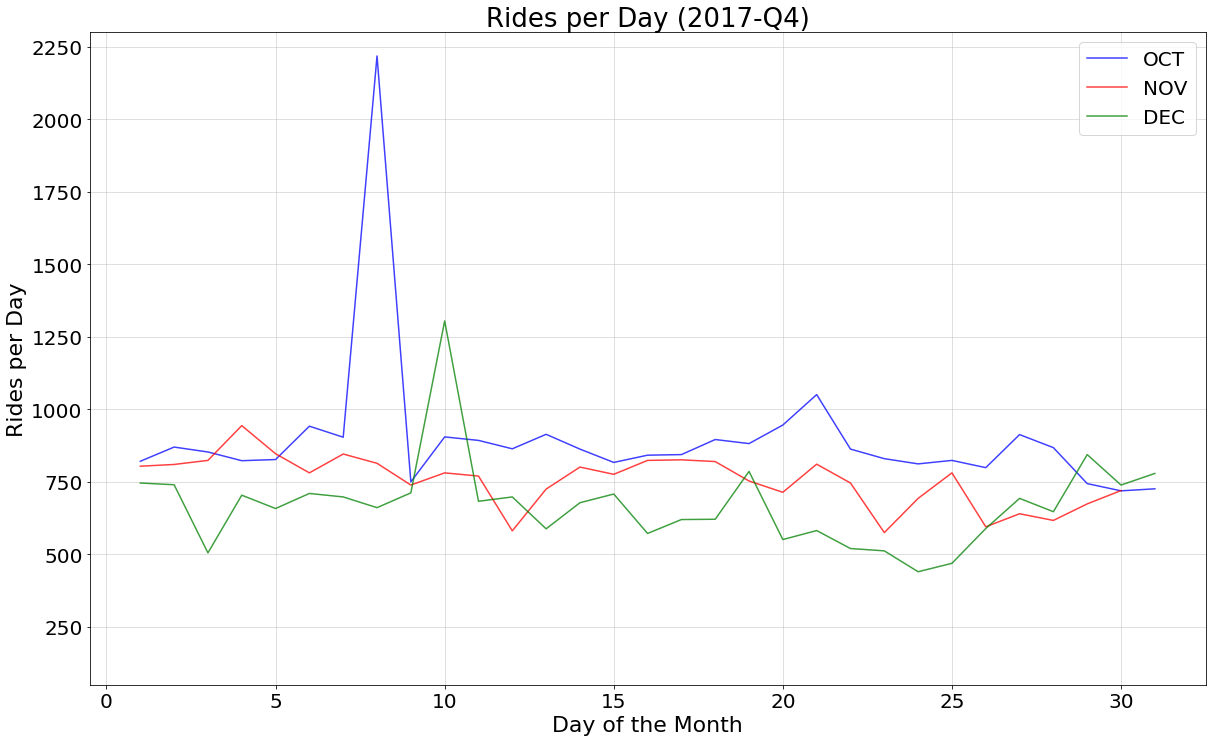

In [27]:
######## QUARTER 4 2017 ########
######## RIDES PER DAY ########

# Convert date/time strings to datetime objects
ride_17_Q4_df['start_time'] = pd.to_datetime(ride_17_Q4_df['start_time'], format='%m/%d/%y %H:%M')

# Add Year, Month, and Day columns
ride_17_Q4_df['Year'] = ride_17_Q4_df['start_time'].dt.year
ride_17_Q4_df['Month'] = ride_17_Q4_df['start_time'].dt.month
ride_17_Q4_df['Day'] = ride_17_Q4_df['start_time'].dt.day

# Trim other quarters
ride_17_Q4_trim_df = ride_17_Q4_df[['start_time', 'Month', 'Day']]

# Group by month and day
groupedby_month_day_17_Q4 = ride_17_Q4_trim_df.groupby(['Month', 'Day']).count()

# Create dataframe and unstack to make months columns
grouped_Q4_df = pd.DataFrame(groupedby_month_day_17_Q4)

# Make Month columns
unstacked_Q4_df = grouped_Q4_df.unstack(level=0)

# Get each months data
month_10 = unstacked_Q4_df[('start_time', 10)]
month_11 = unstacked_Q4_df[('start_time', 11)]
month_12 = unstacked_Q4_df[('start_time', 12)]

x_axis = np.arange(1, 32)

oct_handle = plt.plot(x_axis, month_10, c='blue', alpha=0.75, label="OCT")
nov_handle = plt.plot(x_axis, month_11, c='red', alpha=0.75, label="NOV")
dec_handle = plt.plot(x_axis, month_12, c='green', alpha=0.75, label="DEC")

# Set y axis limits
axes = plt.gca()
axes.set_ylim([50,2300])

plt.grid(axis='both', alpha=0.5)
plt.xlabel("Day of the Month", fontsize = 22)
plt.ylabel("Rides per Day", fontsize = 22)
plt.title('Rides per Day (2017-Q4)', fontsize = 26)

plt.rcParams['figure.figsize'] = (20,12)

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

plt.legend(loc='upper right', fontsize = 20)

# Save Figure
plt.savefig("rides_per_day_17Q4.png", bbox_inches="tight")


# Note for Oct 8th
# http://www.welikela.com/event/ciclavia-heart-la-returns-october-8-2017/


In [13]:
# Show plot
plt.show()

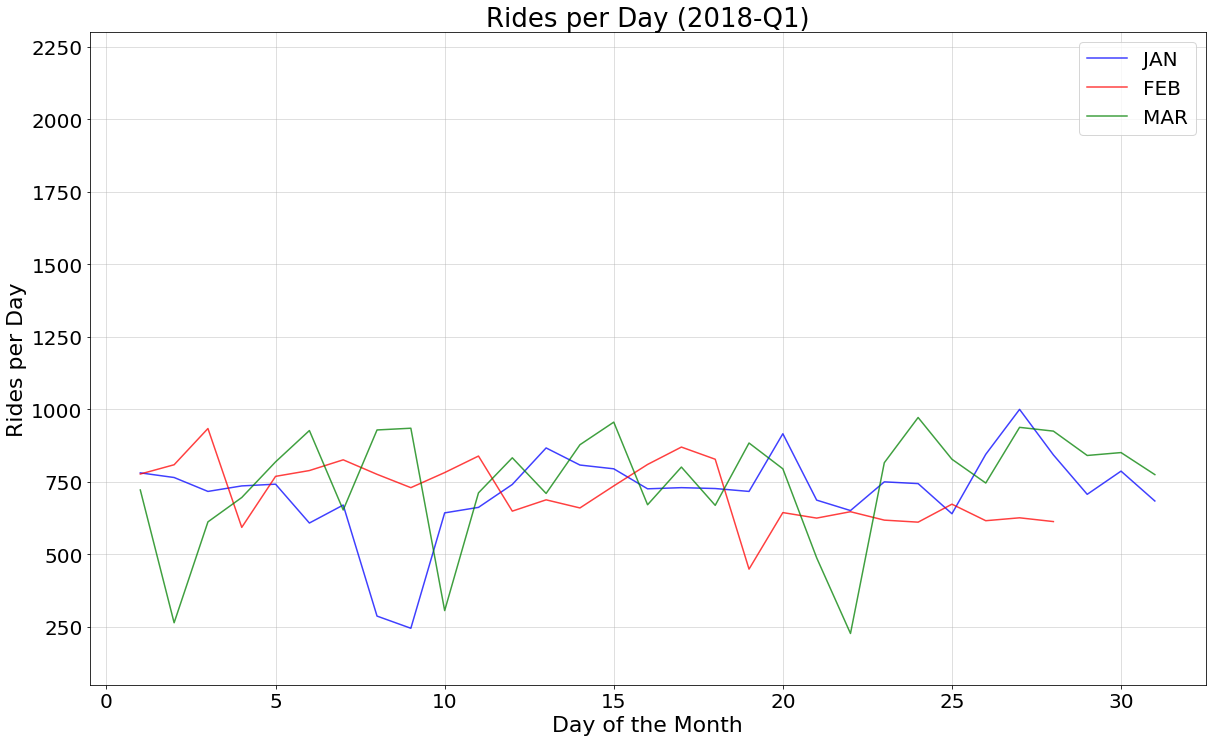

In [14]:
######## QUARTER 1 2018 ########
######## RIDES PER DAY ########

# Convert date/time strings to datetime objects
ride_18_Q1_df['start_time'] = pd.to_datetime(ride_18_Q1_df['start_time'], format='%m/%d/%y %H:%M')

# Add Year, Month, and Day columns
ride_18_Q1_df['Year'] = ride_18_Q1_df['start_time'].dt.year
ride_18_Q1_df['Month'] = ride_18_Q1_df['start_time'].dt.month
ride_18_Q1_df['Day'] = ride_18_Q1_df['start_time'].dt.day

# Trim other quarters
ride_18_Q1_trim_df = ride_18_Q1_df[['start_time', 'Month', 'Day']].copy()

# Group by month and day
groupedby_month_day_18_Q1 = ride_18_Q1_trim_df.groupby(['Month', 'Day']).count()

# Create dataframe and unstack to make months columns
grouped_18_Q1_df = pd.DataFrame(groupedby_month_day_18_Q1)

# Make Month columns
unstacked_18_Q1_df = grouped_18_Q1_df.unstack(level=0)
unstacked_18_Q1_df.head(20)

# Get each months data
month_1 = unstacked_18_Q1_df[('start_time', 1)]
month_2 = unstacked_18_Q1_df[('start_time', 2)]
month_3 = unstacked_18_Q1_df[('start_time', 3)]

x_axis = np.arange(1, 32)

oct_handle = plt.plot(x_axis, month_1, c='blue', alpha=0.75, label="JAN")
nov_handle = plt.plot(x_axis, month_2, c='red', alpha=0.75, label="FEB")
dec_handle = plt.plot(x_axis, month_3, c='green', alpha=0.75, label="MAR")

# Set y axis limits
axes = plt.gca()
axes.set_ylim([50,2300])

plt.grid(axis='both', alpha=0.5)
plt.xlabel("Day of the Month", fontsize = 22)
plt.ylabel("Rides per Day", fontsize = 22)
plt.title('Rides per Day (2018-Q1)', fontsize = 26)

plt.rcParams['figure.figsize'] = (20,12)

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

plt.legend(loc='upper right', fontsize = 20)


In [15]:
# Show plot
plt.show()

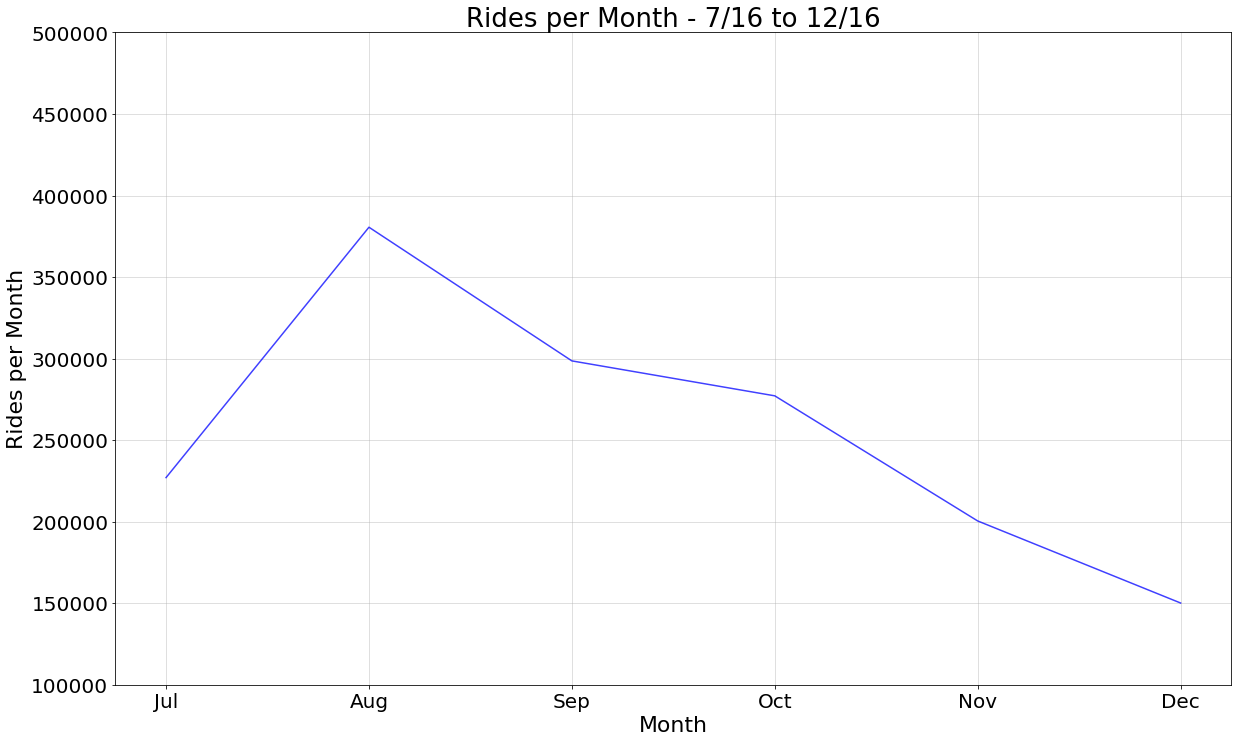

In [16]:
### This is the original csv file with data from 7/16 to 12/17 ###

# Get 2016 data
ride_orig_2016_df = ride_orig_df.loc[ride_orig_df['Year'] == 2016]

# Get rid of unnessary columns
ride_trim_2016_df = ride_orig_2016_df[['Month', 'Day']].copy()

# Group by month
groupedby_month_16 = ride_trim_2016_df.groupby(['Month']).sum()

# Create dataframe
grouped_16_df = pd.DataFrame(groupedby_month_16)

y_axis = grouped_16_df['Day']

x_axis = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set y axis limits
axes = plt.gca()
axes.set_ylim([100000,500000])

months_handle = plt.plot(x_axis, y_axis, c='blue', alpha=0.75)

plt.grid(axis='both', alpha=0.5)
plt.xlabel("Month", fontsize = 22)
plt.ylabel("Rides per Month", fontsize = 22)
plt.title('Rides per Month - 7/16 to 12/16', fontsize = 26)

plt.rcParams['figure.figsize'] = (20,12)

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)


In [17]:
# Show plot
plt.show()

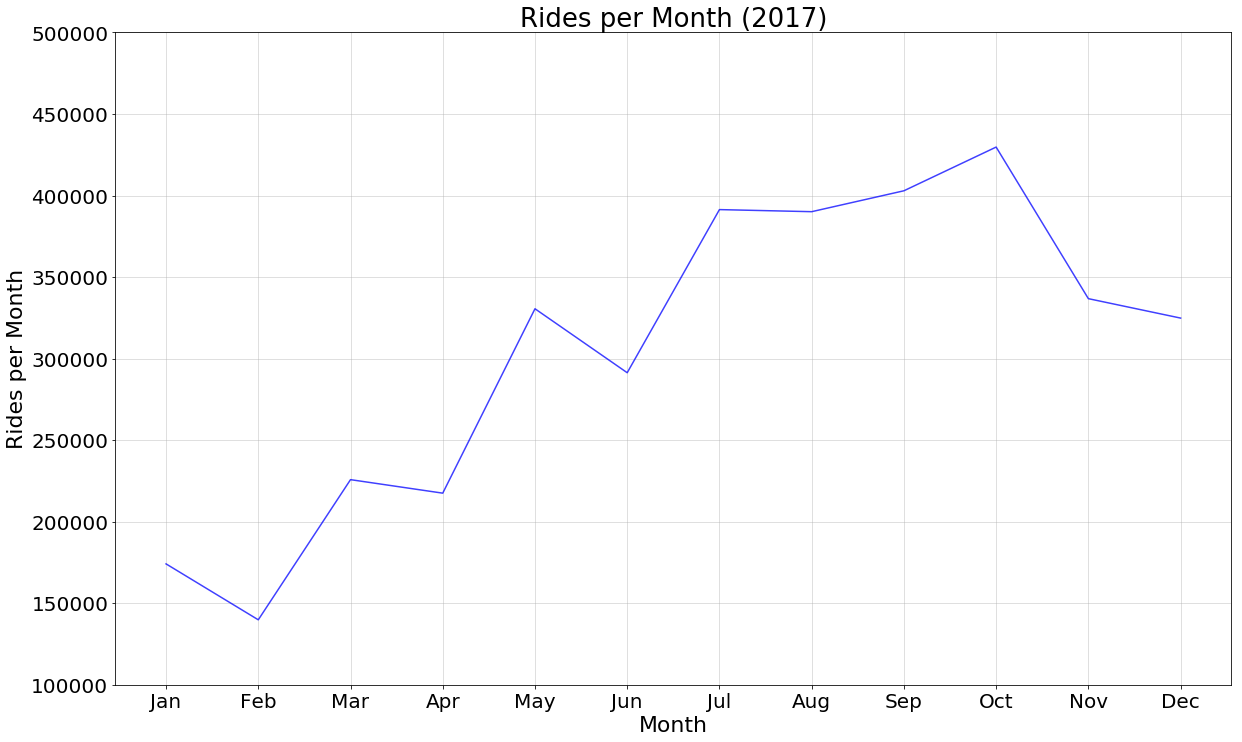

In [18]:
### 2017 RIDES PER MONTH ###

# Get 2017 data
ride_orig_2017_df = ride_orig_df.loc[ride_orig_df['Year'] == 2017]

# Get rid of unnessary columns
ride_trim_17_Q1_df = ride_orig_2017_df[['Month', 'Day']].copy()
ride_trim_17_Q2_df = ride_17_Q2_df[['Month', 'Day']].copy()
ride_trim_17_Q3_df = ride_17_Q3_df[['Month', 'Day']].copy()
ride_trim_17_Q4_df = ride_17_Q4_df[['Month', 'Day']].copy()

# Create one dataframe
frames = [ride_trim_17_Q1_df, ride_trim_17_Q2_df, ride_trim_17_Q3_df, ride_trim_17_Q4_df]
combined_2017_ride_df = pd.concat(frames, ignore_index=True)

# Group by month
grouped_2017_ride_month = combined_2017_ride_df.groupby(['Month']).sum()

# Create dataframe
grouped_2017_df = pd.DataFrame(grouped_2017_ride_month)

y_axis = grouped_2017_df['Day']

x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set y axis limits
axes = plt.gca()
axes.set_ylim([100000,500000])

months_2017_handle = plt.plot(x_axis, y_axis, c='blue', alpha=0.75)

plt.grid(axis='both', alpha=0.5)
plt.xlabel("Month", fontsize = 22)
plt.ylabel("Rides per Month", fontsize = 22)
plt.title('Rides per Month (2017)', fontsize = 26)

plt.rcParams['figure.figsize'] = (20,12)

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)


In [19]:
# Show plot
plt.show()

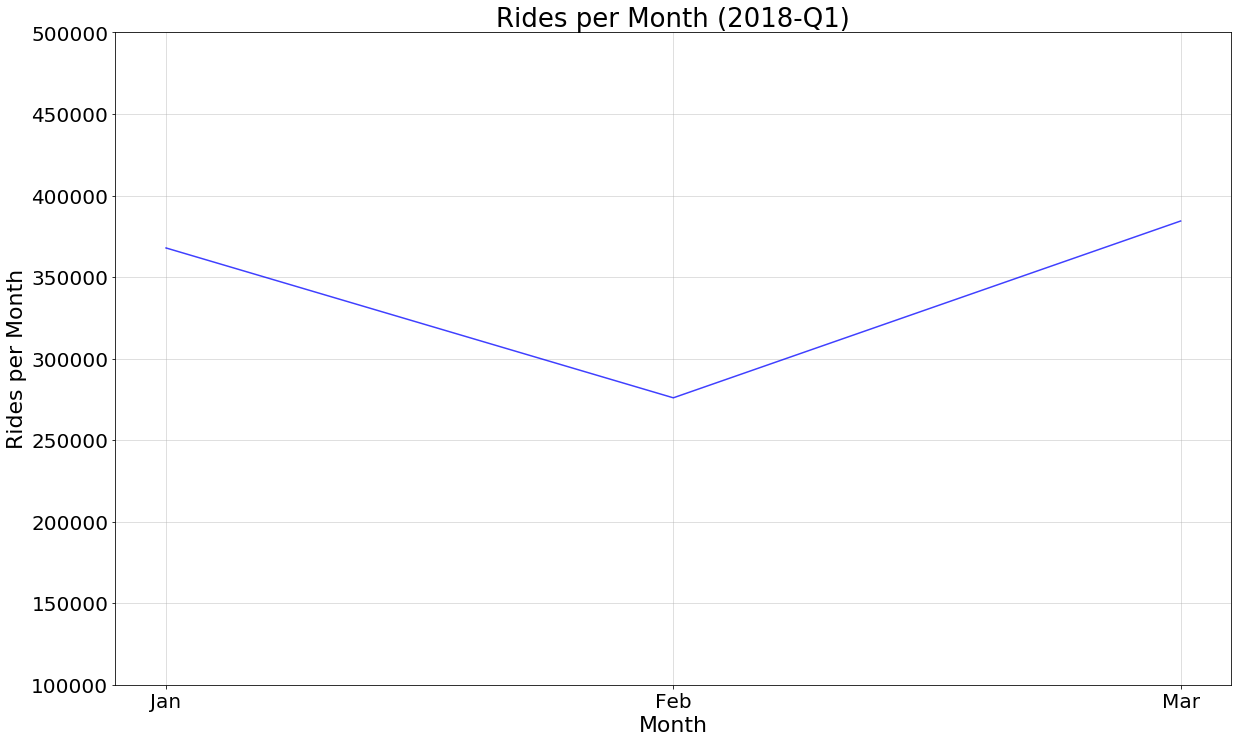

In [20]:
### 2018 Q1 RIDES PER MONTH ###

# Get rid of unnessary columns
ride_trim_18_Q1_df = ride_18_Q1_df[['Month', 'Day']].copy()

# Group by month
grouped_2018_Q1_ride_month = ride_trim_18_Q1_df.groupby(['Month']).sum()

# Create dataframe
grouped_2018_Q1_df = pd.DataFrame(grouped_2018_Q1_ride_month)

y_axis = grouped_2018_Q1_df['Day']

x_axis = ['Jan', 'Feb', 'Mar']

# Set y axis limits
axes = plt.gca()
axes.set_ylim([100000,500000])

months_2018_Q1_handle = plt.plot(x_axis, y_axis, c='blue', alpha=0.75)

plt.grid(axis='both', alpha=0.5)
plt.xlabel("Month", fontsize = 22)
plt.ylabel("Rides per Month", fontsize = 22)
plt.title('Rides per Month (2018-Q1)', fontsize = 26)

plt.rcParams['figure.figsize'] = (20,12)

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)


In [21]:
# Show plot
plt.show()

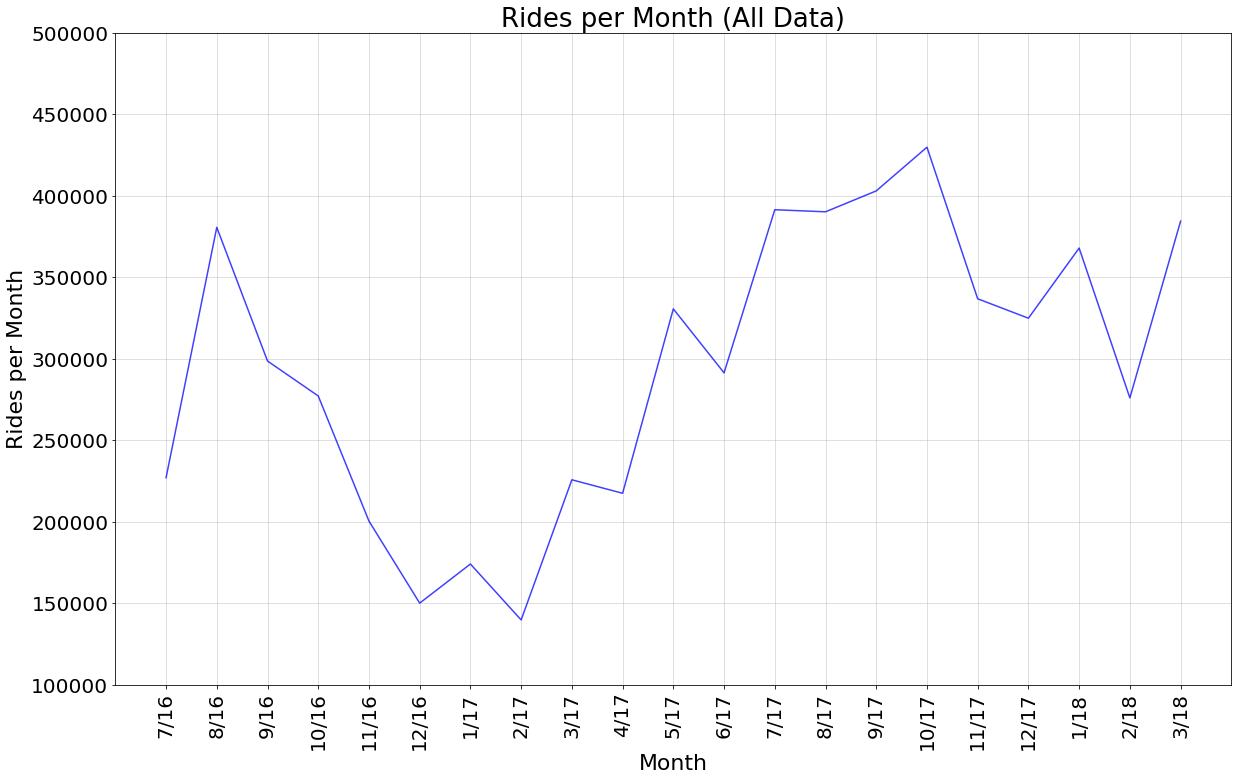

In [22]:
### ALL RIDES PER MONTH ###

ride_orig_df['start_time'] = pd.to_datetime(ride_orig_df['start_time'], format='%m/%d/%Y %I:%M:%S %p')

# Add Year, Month, and Day columns
ride_orig_df['Year'] = ride_orig_df['start_time'].dt.year
ride_orig_df['Month'] = ride_orig_df['start_time'].dt.month
ride_orig_df['Day'] = ride_orig_df['start_time'].dt.day

# Get 2016 data (should already have new columns)
ride_orig_2016_df = ride_orig_df.loc[ride_orig_df['Year'] == 2016]

# Get Months
ride_16_Q3_7 = ride_orig_2016_df.loc[ride_orig_2016_df['Month'] == 7]
ride_16_Q3_8 = ride_orig_2016_df.loc[ride_orig_2016_df['Month'] == 8]
ride_16_Q3_9 = ride_orig_2016_df.loc[ride_orig_2016_df['Month'] == 9]
ride_16_Q4_10 = ride_orig_2016_df.loc[ride_orig_2016_df['Month'] == 10]
ride_16_Q4_11 = ride_orig_2016_df.loc[ride_orig_2016_df['Month'] == 11]
ride_16_Q4_12 = ride_orig_2016_df.loc[ride_orig_2016_df['Month'] == 12]

# Create quarters dataframes
frames = [ride_16_Q3_7, ride_16_Q3_8, ride_16_Q3_9]
ride_16_Q3_df = pd.concat(frames, ignore_index=True)
frames = [ride_16_Q4_10, ride_16_Q4_11, ride_16_Q4_12]
ride_16_Q4_df = pd.concat(frames, ignore_index=True)

# Get rid of unnecessary columns
ride_trim_16_Q3_df = ride_16_Q3_df[['Month', 'Day']].copy()
ride_trim_16_Q4_df = ride_16_Q4_df[['Month', 'Day']].copy()

# Fix the months so they can be grouped
ride_trim_2017_df['Month'] = ride_trim_2017_df['Month'].apply(lambda x: x + 12)
ride_trim_17_Q2_df['Month'] = ride_trim_17_Q2_df['Month'].apply(lambda x: x + 12)
ride_trim_17_Q3_df['Month'] = ride_trim_17_Q3_df['Month'].apply(lambda x: x + 12)
ride_trim_17_Q4_df['Month'] = ride_trim_17_Q4_df['Month'].apply(lambda x: x + 12)
# # Third set of months, so 2*12 needed
ride_trim_18_Q1_df['Month'] = ride_trim_18_Q1_df['Month'].apply(lambda x: x + 24)


# Create one dataframe
frames = [ride_trim_16_Q3_df, ride_trim_16_Q4_df, ride_trim_2017_df, ride_trim_17_Q2_df,
          ride_trim_17_Q3_df, ride_trim_17_Q4_df, ride_trim_18_Q1_df]
combined_all_rides_df = pd.concat(frames, ignore_index=True, sort=False)
combined_all_rides_df.head(50)

# Group by month
grouped_all_ride_month = combined_all_rides_df.groupby(['Month']).sum()

# Create dataframe
grouped_all_df = pd.DataFrame(grouped_all_ride_month)

y_axis = grouped_all_df['Day']

x_axis = ['7/16', '8/16', '9/16', '10/16', '11/16', '12/16', '1/17', '2/17', '3/17', '4/17', '5/17',
          '6/17', '7/17', '8/17', '9/17', '10/17', '11/17', '12/17', '1/18', '2/18', '3/18']

# Set y axis limits
axes = plt.gca()
axes.set_ylim([100000,500000])

months_handle = plt.plot(x_axis, y_axis, c='blue', alpha=0.75)

plt.grid(axis='both', alpha=0.5)
plt.xlabel("Month", fontsize = 22)
plt.ylabel("Rides per Month", fontsize = 22)
plt.title('Rides per Month (All Data)', fontsize = 26)
plt.xticks(rotation=90)

plt.rcParams['figure.figsize'] = (20,12)

plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=20)

# Save Figure
plt.savefig("rides_per_month_all_data.png")


In [23]:
# Show plot
plt.show()

In [24]:
# ### Looking at the payment types per month
# ### Note that the Day pass was introduced in 17Q4

# ride_orig_df['start_time'] = pd.to_datetime(ride_orig_df['start_time'], format='%m/%d/%Y %I:%M:%S %p')

# # Add Year, Month, and Day columns
# ride_orig_df['Year'] = ride_orig_df['start_time'].dt.year
# ride_orig_df['Month'] = ride_orig_df['start_time'].dt.month
# ride_orig_df['Day'] = ride_orig_df['start_time'].dt.day

# # Get 2016 data (should already have new columns)
# ride_orig_2016_df = ride_orig_df.loc[ride_orig_df['Year'] == 2016]

# # Get Months
# ride_16_Q3_7 = ride_orig_2016_df.loc[ride_orig_2016_df['Month'] == 7]
# ride_16_Q3_8 = ride_orig_2016_df.loc[ride_orig_2016_df['Month'] == 8]
# ride_16_Q3_9 = ride_orig_2016_df.loc[ride_orig_2016_df['Month'] == 9]
# ride_16_Q4_10 = ride_orig_2016_df.loc[ride_orig_2016_df['Month'] == 10]
# ride_16_Q4_11 = ride_orig_2016_df.loc[ride_orig_2016_df['Month'] == 11]
# ride_16_Q4_12 = ride_orig_2016_df.loc[ride_orig_2016_df['Month'] == 12]

# # Create quarters dataframes
# frames = [ride_16_Q3_7, ride_16_Q3_8, ride_16_Q3_9]
# ride_16_Q3_df = pd.concat(frames, ignore_index=True)
# frames = [ride_16_Q4_10, ride_16_Q4_11, ride_16_Q4_12]
# ride_16_Q4_df = pd.concat(frames, ignore_index=True)

# # Get rid of unnecessary columns
# ride_trim_16_Q3_df = ride_16_Q3_df[['Month', 'Day']].copy()
# ride_trim_16_Q4_df = ride_16_Q4_df[['Month', 'Day']].copy()


# ### Payments per quarter

# # Make the column names the same
# ride_16_Q3_df.rename(columns={'Passholder Type':'passholder_type'}, inplace=True)
# ride_16_Q4_df.rename(columns={'Passholder Type':'passholder_type'}, inplace=True)
# ride_17_Q1_df.rename(columns={'Passholder Type':'passholder_type'}, inplace=True)
# ride_16_Q3_df.rename(columns={'Trip ID':'trip_id'}, inplace=True)
# ride_16_Q4_df.rename(columns={'Trip ID':'trip_id'}, inplace=True)
# ride_17_Q1_df.rename(columns={'Trip ID':'trip_id'}, inplace=True)





# # Add Days of the week
# ride_16_Q3_df['day_of_week'] = ride_16_Q3_df['start_time'].dt.weekday_name
# ride_16_Q4_df['day_of_week'] = ride_16_Q4_df['start_time'].dt.weekday_name
# ride_17_Q1_df['day_of_week'] = ride_17_Q1_df['start_time'].dt.weekday_name
# ride_17_Q2_df['day_of_week'] = ride_17_Q2_df['start_time'].dt.weekday_name
# ride_17_Q3_df['day_of_week'] = ride_17_Q3_df['start_time'].dt.weekday_name
# ride_17_Q4_df['day_of_week'] = ride_17_Q4_df['start_time'].dt.weekday_name
# ride_18_Q1_df['day_of_week'] = ride_18_Q1_df['start_time'].dt.weekday_name

# # Trim the columns
# # Get rid of unnessary columns
# ride_trim_16_Q3_df = ride_16_Q3_df[['trip_id', 'passholder_type']].copy()
# ride_trim_16_Q4_df = ride_16_Q4_df[['trip_id', 'passholder_type']].copy()
# ride_trim_17_Q1_df = ride_17_Q1_df[['trip_id', 'passholder_type']].copy()
# ride_trim_17_Q2_df = ride_17_Q2_df[['trip_id', 'passholder_type']].copy()
# ride_trim_17_Q3_df = ride_17_Q3_df[['trip_id', 'passholder_type']].copy()
# ride_trim_17_Q4_df = ride_17_Q4_df[['trip_id', 'passholder_type']].copy()
# ride_trim_18_Q1_df = ride_18_Q1_df[['trip_id', 'passholder_type']].copy()

# # Group By day of the week and passholder type
# groupedby_type_16Q3 = ride_trim_16_Q3_df.groupby(['passholder_type']).count()
# groupedby_type_16Q4 = ride_trim_16_Q4_df.groupby(['passholder_type']).count()
# groupedby_type_17Q1 = ride_trim_17_Q1_df.groupby(['passholder_type']).count()
# groupedby_type_17Q2 = ride_trim_17_Q2_df.groupby(['passholder_type']).count()
# groupedby_type_17Q3 = ride_trim_17_Q3_df.groupby(['passholder_type']).count()
# groupedby_type_17Q4 = ride_trim_17_Q4_df.groupby(['passholder_type']).count()
# groupedby_type_18Q1 = ride_trim_18_Q1_df.groupby(['passholder_type']).count()

# #------------------#
# # Create dataframes from grouped data
# groupedby_type_16Q3_df = pd.DataFrame(groupedby_type_16Q3)
# groupedby_type_16Q4_df = pd.DataFrame(groupedby_type_16Q4)
# groupedby_type_17Q1_df = pd.DataFrame(groupedby_type_17Q1)
# groupedby_type_17Q2_df = pd.DataFrame(groupedby_type_17Q2)
# groupedby_type_17Q3_df = pd.DataFrame(groupedby_type_17Q3)
# groupedby_type_17Q4_df = pd.DataFrame(groupedby_type_17Q4)
# groupedby_type_18Q1_df = pd.DataFrame(groupedby_type_18Q1)

# # Build the plot
# # trip_id has totals per quarter
# y_axis_16Q3 = groupedby_type_16Q3_df['trip_id']
# y_axis_16Q4 = groupedby_type_16Q4_df['trip_id']
# y_axis_17Q1 = groupedby_type_17Q1_df['trip_id']
# y_axis_17Q2 = groupedby_type_17Q2_df['trip_id']
# y_axis_17Q3 = groupedby_type_17Q3_df['trip_id']
# y_axis_17Q4 = groupedby_type_17Q4_df['trip_id']
# y_axis_18Q1 = groupedby_type_18Q1_df['trip_id']

# x_axis = ['7/16', '8/16', '9/16', '10/16', '11/16', '12/16', '1/17', '2/17', '3/17', '4/17', '5/17',
#           '6/17', '7/17', '8/17', '9/17', '10/17', '11/17', '12/17', '1/18', '2/18', '3/18']
# _x_axis = np.arange(len(x_axis))

# y_axis_16Q3

# plt.bar(_x_axis - 0.3, y_axis_16Q3, width=0.1, label="16Q3")
# plt.bar(_x_axis - 0.2, y_axis_16Q4, width=0.1, label="16Q4")
# plt.bar(_x_axis - 0.1, y_axis_17Q1, width=0.1, label="17Q1")
# plt.bar(_x_axis - 0.0, y_axis_17Q2, width=0.1, label="17Q2")
# plt.bar(_x_axis + 0.1, y_axis_17Q3, width=0.1, label="17Q3")
# plt.bar(_x_axis + 0.2, y_axis_17Q4, width=0.1, label="17Q4")
# plt.bar(_x_axis + 0.3, y_axis_18Q1, width=0.1, label="18Q1")
# # plt.xticks(_x_axis, x_axis) # set labels manually

# # plt.legend(loc='upper left', fontsize = 15)

# # plt.grid(axis='y', alpha=0.4)
# # plt.xlabel("Day of the Week", fontsize = 22)
# # plt.ylabel("Rides per Day of the Week", fontsize = 22)
# # plt.title('Rides per Day of the Week (All Data)', fontsize = 26)

# # plt.rcParams['figure.figsize'] = (20,12)

# # plt.rc('xtick',labelsize=20)
# # plt.rc('ytick',labelsize=20)



NameError: name 'ride_17_Q1_df' is not defined